<a href="https://colab.research.google.com/github/DJS-INFOMATRIX/Py-Basics-for-Mentees/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/csv files/Online Sales Data.csv")

# Data Preprocessing

In [ ]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


We don't really require the Transaction ID column. So dropping that column.

In [ ]:
df.drop('Transaction ID', axis=1, inplace=True)
df.head()

,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


We will be reformatting the Date column such that we get one column for the year and one column for the month. We could even make a separate column for the day, but then visualizing all the sales on different days will become complicated and tedious.

In [ ]:
df.isnull().sum()

Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [ ]:
df.dtypes

Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

We can see that the Date column is of the object data type so for us to be able to extract the year and month we will use the to_datetime function in the pandas library which will temporariy convert the date which is in object data format into datetime data form. Then we use the dt.year and dt.month functions to be able to extract out that year and the month respectively.

In [ ]:
df['Year']=pd.to_datetime(df['Date']).dt.year
df['Month']=pd.to_datetime(df['Date']).dt.month

df.head()

,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month
0,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1
1,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,1
2,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,1
3,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,1
4,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,1


In [ ]:
df['Year'].unique()

array([2024], dtype=int32)

Dropping the Year column as well since the dataset only consists of the data from 2024.

In [ ]:
df.drop(['Year','Date'], axis=1,inplace=True)

In [ ]:
df=df.reindex(columns=['Month','Product Category','Product Name','Units Sold','Unit Price','Total Revenue','Region','Payment Method'])

In [ ]:
df.head()

,Month,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,1,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,1,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,1,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,1,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,1,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# **Bar Chart**

Its is a graph in which the length of the bar corresponds to the value of the category.

[]

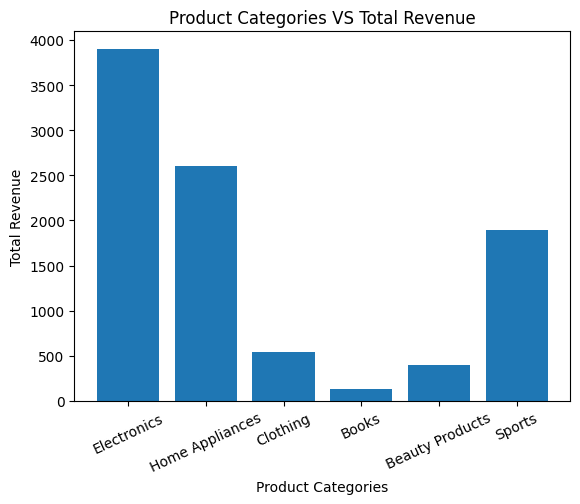

In [ ]:
plt.bar(df['Product Category'],df['Total Revenue'])
plt.title("Product Categories VS Total Revenue")
plt.xlabel("Product Categories")
plt.xticks(rotation=25)
plt.ylabel("Total Revenue")
plt.plot()

From this graph we can conclude that Electronics have the highest total revenue while books have the least total revenue.

# **Pie chart**

It is a graph that can be used to understand the percentage of the distribution of the categories in the dataset.

[]

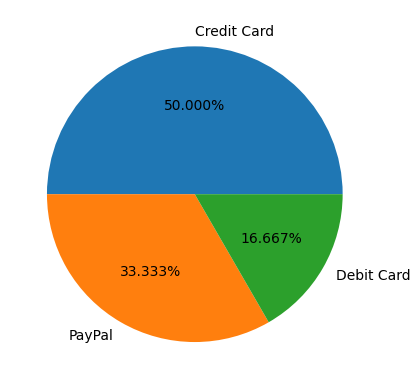

In [ ]:
plt.pie(df['Payment Method'].value_counts(), labels=df['Payment Method'].value_counts().index, autopct='%.3f%%')
#plt.legend(loc='upper right')
plt.plot()

From this graph we understand that majority of the consumers pay using a credit card compared to the people paying via PayPal or a Debit Card.

We can even understand the intricacies of each of the products, such as looking for the most sold book.

Region
Asia             40
North America    80
Name: count, dtype: int64


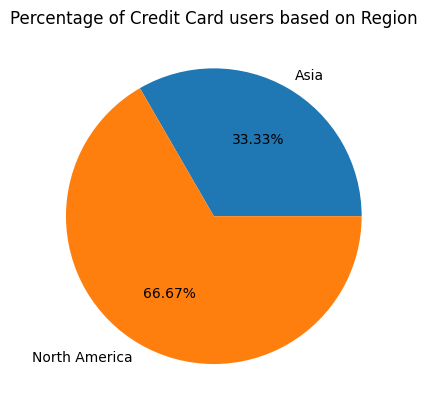

In [ ]:
'''
So basically what the following statement means that it will count the number of occurences of a 'Region' where the 'Payment Method' is 'Credit Card'.
This is because we only want the count of the occurences of the credit card not other payment methods.
Also 'ascending=True' will ensure that these labels of books are arranged in ascending order of the number of occurences
All this data about the count of the occurrences is stored in a variable temp which will be used for plotting.
'''
temp=df[df['Payment Method']=='Credit Card']['Region'].value_counts(ascending=True)
print(temp)

plt.pie(temp,labels=temp.index,autopct='%1.2f%%')
plt.title("Percentage of Credit Card users based on Region")
plt.show()

# **Histogram**

It is a graph that is used to understand the type of distribution of a variable. It is used for continuous data.

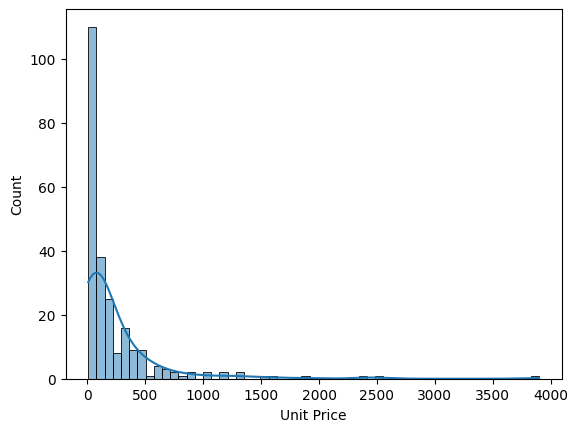

In [ ]:
sns.histplot(df['Unit Price'], kde=True)
plt.show()

From the above graph we can see that the distribution of the prices of the products major lie between 0 to 500 while some outliers are priced at 4000.

Normal Distribution

<Axes: ylabel='Count'>

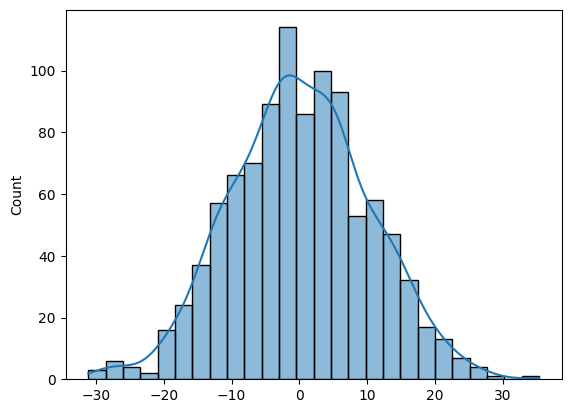

In [ ]:
x=np.random.normal(0,10,1000)
sns.histplot(x,kde=True)

Positive Skewed

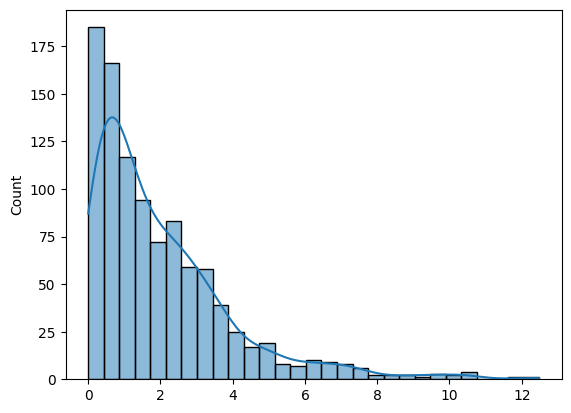

In [ ]:
x=np.random.exponential(2,1000)
sns.histplot(x,kde=True)
plt.show()

Negative Skewed

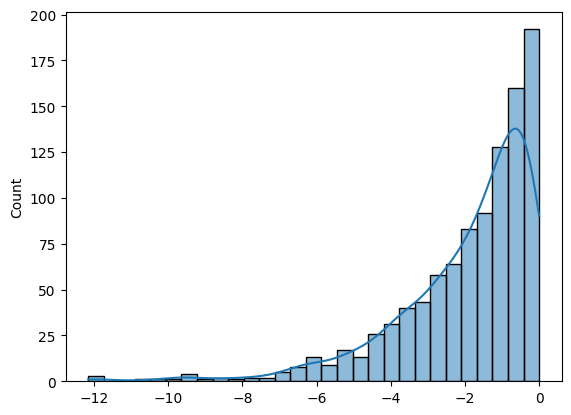

In [ ]:
x=np.random.exponential(2,1000)
sns.histplot(-x,kde=True)
plt.show()

# **Box Plot**

Box plot is a graph which can give us various insights such as the skewness of the data as well as the outliers.

Outliers are datapoints which are either too large or too small which can potentially disrupt the mean value.

Eg: 1,2,1000

mean = (1+2+1000)/3 = 334.33

median = 2nd datapoint = 2

Thus, we can say that median is a better way to understand the central tendency than mean. But this can be taken care of if we find out the outliers in the data and either change their values or remove the datapoint completely.

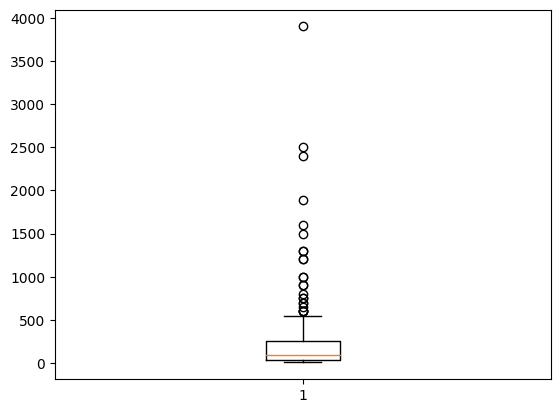

In [ ]:
plt.boxplot(df['Unit Price'])
plt.show()

So from the above graph, the following are the notations:
*   Yellow line : median
*   Upper Side of the Box : 3rd Quartile
*   Lower Side of the Box : 1st Quartile
*   Upper line outside of the box : Upper whisker
*   Lower line outside of the box : Lower whisker
*   Dots : Outlier datapoints


The Forumala for calculating the Upper and Lower Whisker is as follows:

Upper whisker = Q3 + 1.5 x IQR
Lower whisker = Q1 - 1.5 x IQR

All datapoints which are lesser than the value of the Lower Whisker or greater than the value of the Upper Whisker is considered as an outlier.




In [ ]:
df['Unit Price'].describe()

count     240.000000
mean      236.395583
std       429.446695
min         6.500000
25%        29.500000
50%        89.990000
75%       249.990000
max      3899.990000
Name: Unit Price, dtype: float64

In [ ]:
q1=np.percentile(df['Unit Price'],25)
q3=np.percentile(df['Unit Price'],75)

print(f'Q1 : {q1}\nQ3 : {q3}')

iqr=q3-q1
print(f'IQR : {iqr}')

uw=q3+1.5*iqr
lw=q1-1.5*iqr

print(f'Lower Whisker : {lw}\nUpper Whisker : {uw}')

Q1 : 29.5
Q3 : 249.99
IQR : 220.49
Lower Whisker : -301.235
Upper Whisker : 580.725


Now we can replace the values of the outlier with the upper or lower whisker value. For all the outlier values greater than the upper whisker we replace their values with the upper whisker and the outlier with values lower than the lower whisker can be replaced with the value of the lower whisker.

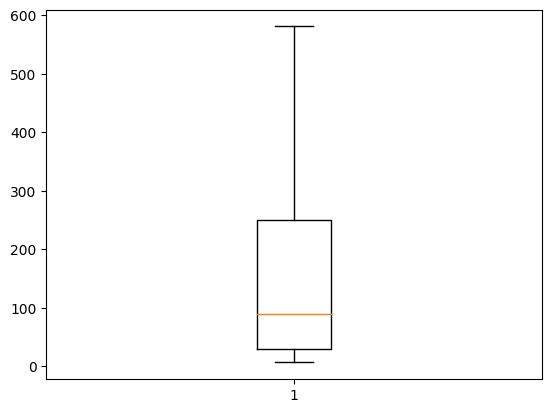

In [ ]:
'''
So the code works as follows :
The loc function is used to find the location of the rows in a column for which the condition is true.
The condition is checked, i.e. if the value in the 'Unit Price' column is greater than ul or not.
When the condition is satisfied that row number will be selected by the loc function and the 'Unit Price' value will be changed using the assignment operator to ul.

It works in the same way for the lower whisker as well
'''
df.loc[df['Unit Price']>uw, 'Unit Price']=uw
df.loc[df['Unit Price']<lw, 'Unit Price']=lw

plt.boxplot(df['Unit Price'])
plt.show()

# **Understanding how 'groupby' function in pandas works**

In [ ]:
df.groupby('Product Category')['Unit Price']

It is difficult to visualize what exactly is groupby doing but we can think of it like a 2D table, where on one side we have all the 'Product Category' and then on the other dimension there is the values of the other columns.

You can think of it being as follows :

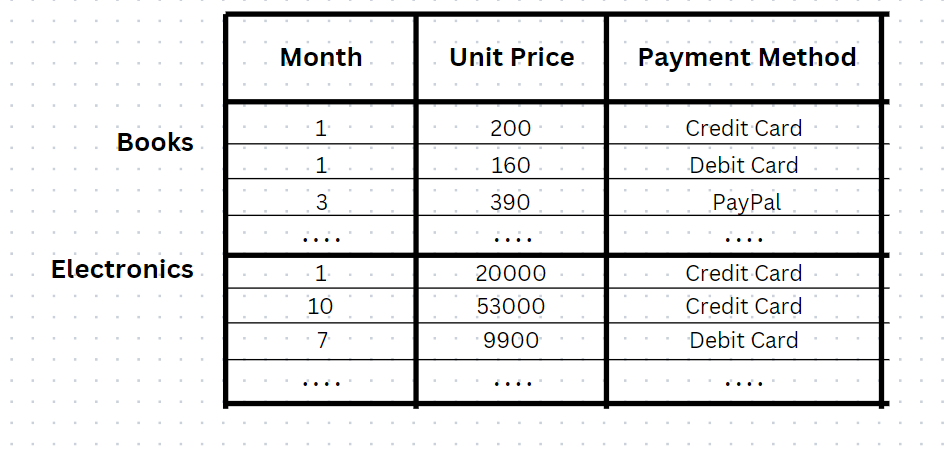



Once we get a grouped table as shown above we can select a set of columns on which actions are to be performed. These actions either be predefined functions such as .mean() , .median() , .min() and so on, or we can even define our own functions and use the .apply() function and pass in the name of the function in the paranthesis.

In [ ]:
#Applying a predefined function on grouped data
df.groupby('Product Category')[['Unit Price','Total Revenue']].mean()

,Unit Price,Total Revenue
Product Category,,
Beauty Products,61.6230,65.54750
Books,16.1530,46.54825
Clothing,67.5365,203.22325
Electronics,691.5915,874.56025
Home Appliances,320.1855,466.15400
Sports,261.2840,358.16300


In [ ]:
def do_smth(grp):
    print(grp)
    print('*****************')


df.groupby("Product Category")['Unit Price'].apply(do_smth)

4       89.99
10     129.99
16     399.99
22      49.99
28      29.99
34      39.99
40     105.00
46      52.00
52      49.00
58      23.00
64     102.00
70      78.00
76      16.00
82     100.00
88     105.00
94      68.00
100     82.00
106      6.50
112     15.00
118     14.99
124     30.00
130     36.00
136      6.80
142     29.50
148     25.00
154     59.00
160     36.00
166     16.99
172     29.50
178     34.00
184    190.00
190     18.00
196    125.00
202     52.00
208     79.00
214     29.00
220     27.00
226      6.70
232     24.00
238     55.00
Name: Beauty Products, dtype: float64
*****************
3      15.99
9      25.99
15     35.99
21     22.99
27     12.99
33     19.99
39     24.99
45     32.50
51     26.99
57     28.00
63     18.99
69     10.99
75     14.99
81     12.99
87     13.99
93     14.99
99     12.99
105    10.99
111    18.99
117    16.99
123    14.99
129     8.99
135     9.99
141    11.99
147    10.99
153    16.99
159     7.99
165     8.99
171     9.99
177    

Product Category
Beauty Products    None
Books              None
Clothing           None
Electronics        None
Home Appliances    None
Sports             None
Name: Unit Price, dtype: object

# **Scatter Plot**

It is a plot of all the data points for the corresponding axes. It is useful for understanding the correlation and covariance of the two features that are plotted.


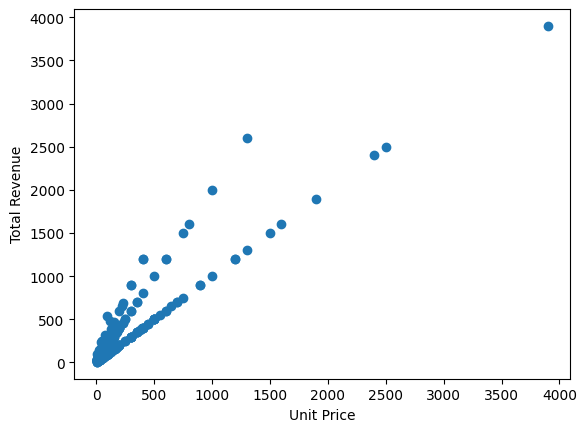

In [ ]:
plt.scatter(df['Unit Price'],df['Total Revenue'])
plt.xlabel("Unit Price")
plt.ylabel("Total Revenue")
plt.show()

In this graph we can see 5 different lines, these might be the relation between the unit prices and the total revenue cocrrelation for each of the different product categories. So we can try plotting each by grouping them based on their product catgory.

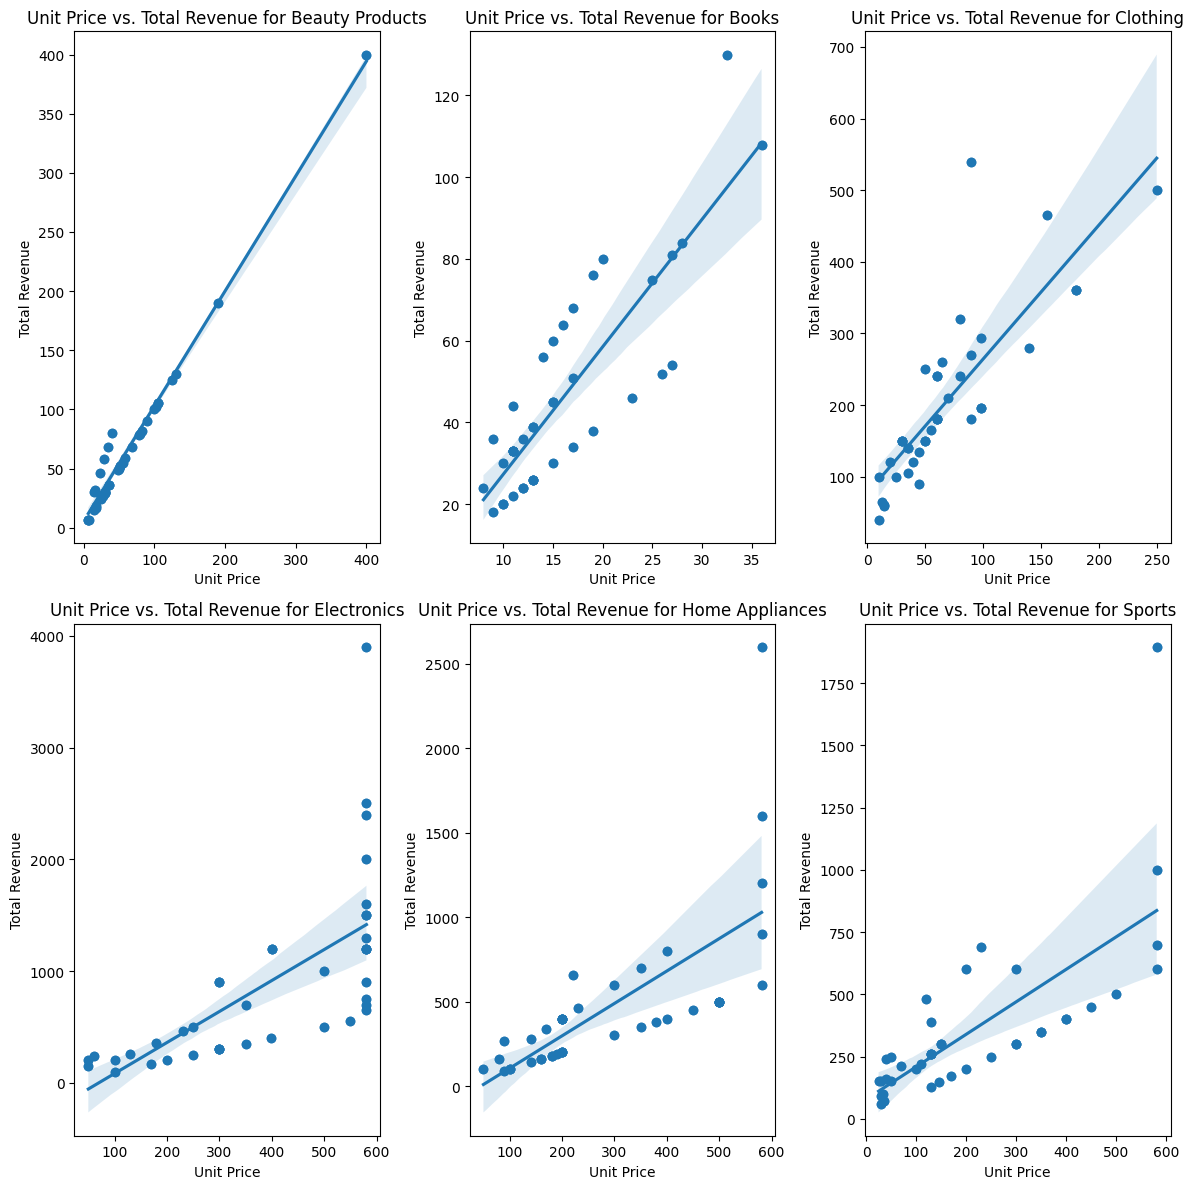

In [ ]:
i=1
plt.figure(figsize=(12, 12))

for name, group in df.groupby('Product Category'):
    plt.subplot(2,3,i)
    plt.scatter(group['Unit Price'], group['Total Revenue'], label=name,)
    sns.regplot(x='Unit Price', y='Total Revenue', data=group)    # This is used to plot the regression line (aka the line of best fit) for each of the group.
    plt.xlabel('Unit Price')
    plt.ylabel('Total Revenue')
    plt.title(f'Unit Price vs. Total Revenue for {name}')
    i+=1
plt.tight_layout()    #Used to give spacing between the plots such that the titles don't overlap each other
plt.show()

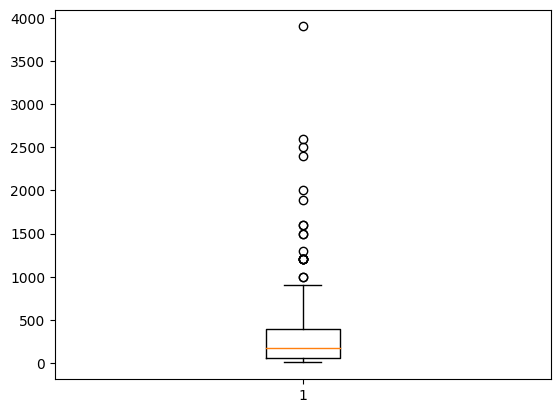

In [ ]:
plt.boxplot(df['Total Revenue'])
plt.show()

In [ ]:
q1=np.percentile(df['Total Revenue'],25)
q3=np.percentile(df['Total Revenue'],75)

print(f'Q1 : {q1}\nQ3 : {q3}')

iqr=q3-q1
print(f'IQR : {iqr}')

uw=q3+1.5*iqr
lw=q1-1.5*iqr

print(f'Lower Whisker : {lw}\nUpper Whisker : {uw}')

Q1 : 62.965
Q3 : 399.225
IQR : 336.26
Lower Whisker : -441.42499999999995
Upper Whisker : 903.615


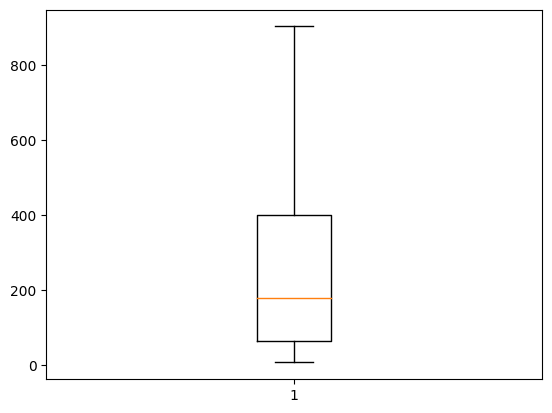

In [ ]:
df.loc[df['Total Revenue']>uw, 'Total Revenue']=uw
df.loc[df['Total Revenue']<lw, 'Total Revenue']=lw

plt.boxplot(df['Total Revenue'])
plt.show()

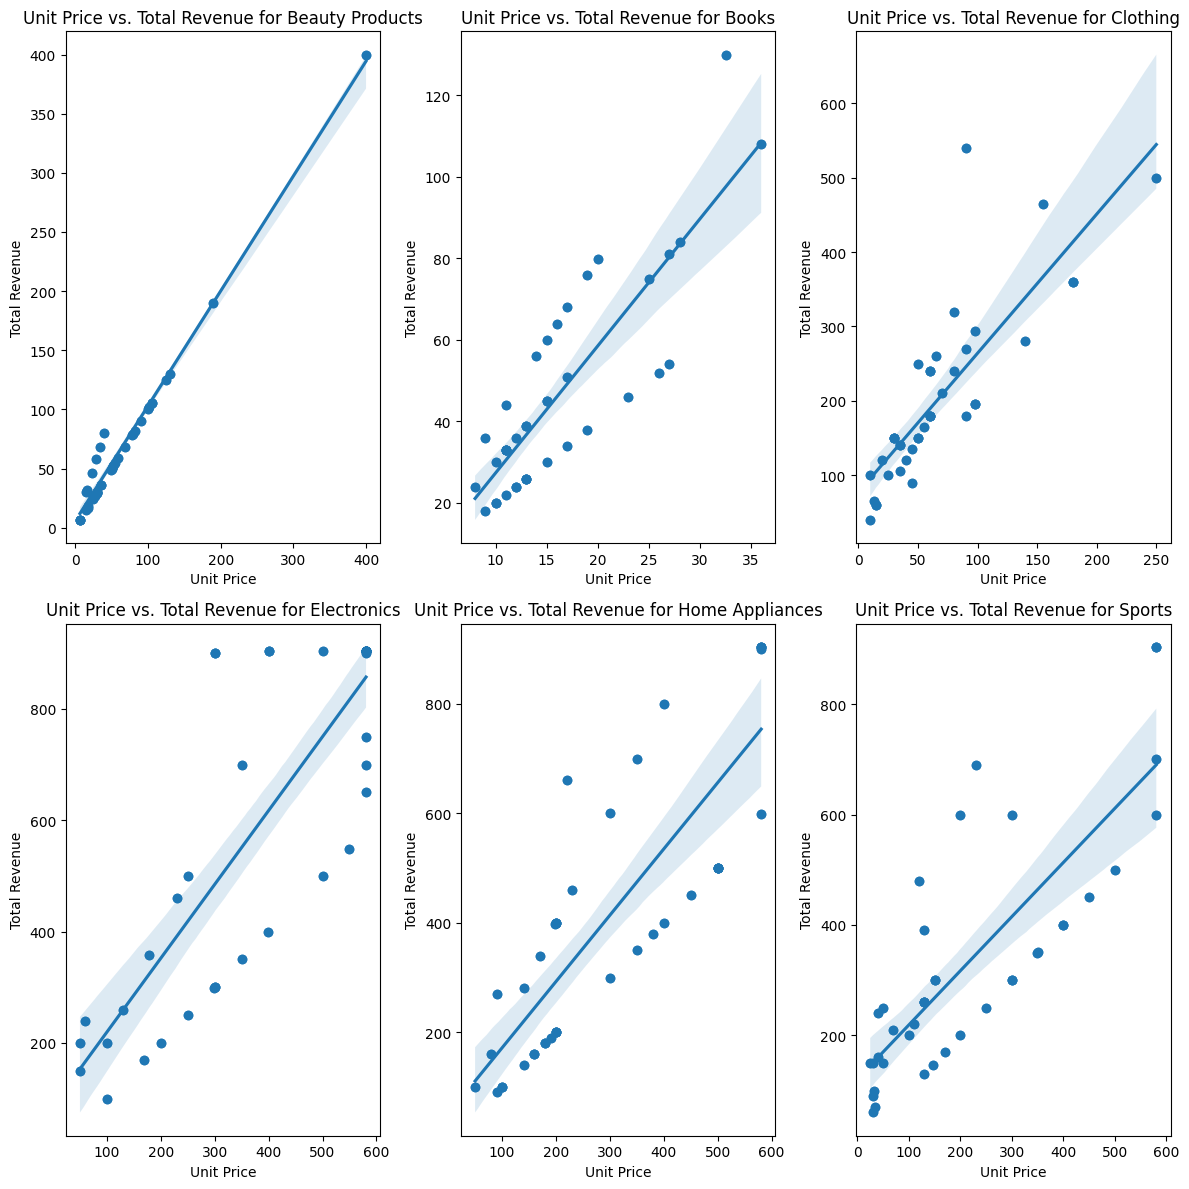

In [ ]:
i=1
plt.figure(figsize=(12, 12))

for name, group in df.groupby('Product Category'):
    plt.subplot(2,3,i)
    plt.scatter(group['Unit Price'], group['Total Revenue'], label=name,)
    sns.regplot(x='Unit Price', y='Total Revenue', data=group)    # This is used to plot the regression line (aka the line of best fit) for each of the group.
    plt.xlabel('Unit Price')
    plt.ylabel('Total Revenue')
    plt.title(f'Unit Price vs. Total Revenue for {name}')
    i+=1
plt.tight_layout()    #Used to give spacing between the plots such that the titles don't overlap each other
plt.show()

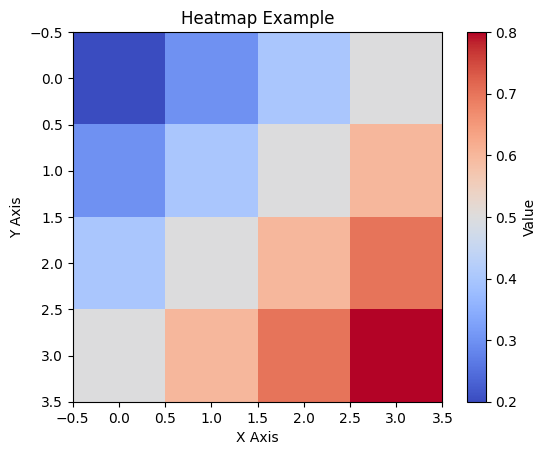

In [ ]:
data = np.array([
    [0.2, 0.3, 0.4, 0.5],
    [0.3, 0.4, 0.5, 0.6],
    [0.4, 0.5, 0.6, 0.7],
    [0.5, 0.6, 0.7, 0.8]
])

plt.imshow(data, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Value')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap Example')
plt.show()